In [124]:
#Dependenceis

from spotipy.oauth2 import SpotifyClientCredentials
import spotipy
from spotipy import util
import sys
from pprint import pprint
from config import cid
from config import secret
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
from scipy.stats import pearsonr
from scipy.stats import f_oneway

#import set client id and secret key
client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

# Data Sources

We imported data a list of tracks from spotify's top 200 list in canada and used track information from spotify's API.

In [2]:
#top 200 hundred songs in Canada
CA_20200311_file = pd.read_csv('Resources/regional-ca-daily-latest.csv', header = 1)
CA_Q1_file = pd.read_csv('Resources/regional-ca-daily-2019-03-31.csv', header = 1)
CA_Q2_file = pd.read_csv('Resources/regional-ca-daily-2019-06-30.csv', header = 1)
CA_Q3_file = pd.read_csv('Resources/regional-ca-daily-2019-09-30.csv', header = 1)
CA_Q4_file = pd.read_csv('Resources/regional-ca-daily-2019-12-31.csv', header = 1)

top_songs_CA_Q1 = pd.DataFrame(CA_Q1_file)
top_songs_CA_Q2 = pd.DataFrame(CA_Q2_file)
top_songs_CA_Q3 = pd.DataFrame(CA_Q3_file)
top_songs_CA_Q4 = pd.DataFrame(CA_Q4_file)

top_songs_CA_Q1.head()

,Position,Track Name,Artist,Streams,URL
0,1,bad guy,Billie Eilish,288698,https://open.spotify.com/track/2Fxmhks0bxGSBdJ...
1,2,Old Town Road,Lil Nas X,188943,https://open.spotify.com/track/53CJANUxooaqGOt...
2,3,wish you were gay,Billie Eilish,188177,https://open.spotify.com/track/3Fj47GNK2kUF0ua...
3,4,bury a friend,Billie Eilish,151088,https://open.spotify.com/track/4SSnFejRGlZikf0...
4,5,Sunflower - Spider-Man: Into the Spider-Verse,Post Malone,146852,https://open.spotify.com/track/3KkXRkHbMCARz0a...


In [3]:
#create a list of the csv file data frames
df_list = [top_songs_CA_Q1 ,top_songs_CA_Q2 ,top_songs_CA_Q3 ,top_songs_CA_Q4 ]

master_dictionary = {}

#create a dictionary of a dictionary for the extracted data from the api
for index, dataF in enumerate(df_list):

    #Create data frame of Q1 data
    dictionary = {}
    dictionary['Duration'] = []

    for i,x in dataF.iterrows():
        dictionary['Duration'].append('hello')
    
    master_dictionary[index] = dictionary

In [155]:
#Get json output of a track
urn = 'spotify:track:0nbXyq5TXYPCO7pr3N8S4I'
url = 'https://open.spotify.com/track/0nbXyq5TXYPCO7pr3N8S4I'
#sp = spotipy.Spotify(client_credentials_manager=SpotifyClientCredentials())

track = sp.track(url)
#audio_analysis = sp.audio_analysis(url)
audio_feature = sp.audio_features(url)
pprint(audio_feature)

[{'acousticness': 0.104,
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/0nbXyq5TXYPCO7pr3N8S4I',
  'danceability': 0.896,
  'duration_ms': 196653,
  'energy': 0.586,
  'id': '0nbXyq5TXYPCO7pr3N8S4I',
  'instrumentalness': 0,
  'key': 10,
  'liveness': 0.79,
  'loudness': -6.687,
  'mode': 0,
  'speechiness': 0.0559,
  'tempo': 116.971,
  'time_signature': 4,
  'track_href': 'https://api.spotify.com/v1/tracks/0nbXyq5TXYPCO7pr3N8S4I',
  'type': 'audio_features',
  'uri': 'spotify:track:0nbXyq5TXYPCO7pr3N8S4I',
  'valence': 0.642}]


# Create Dataframe of needed information

In [5]:
#sample = top_songs_CA_Q1[:50].copy()

### Pull data for all for Quarters

In [6]:
#create a list of the csv file data frames
df_list = [top_songs_CA_Q1 ,top_songs_CA_Q2 ,top_songs_CA_Q3 ,top_songs_CA_Q4 ]

#create empty master dictionary for loop below that accumulate extracted api data
master_dictionary = {}

#Create data frame for each quarter data
for index, dataF in enumerate(df_list):
    
    dictionary = {}
    dictionary['Duration'] = []
    dictionary['Popularity'] = []
    dictionary['Track Name'] = []
    dictionary['Artist Name'] = []
    dictionary['Tempo'] = []
    dictionary['Valence'] = []
    dictionary['Speechiness'] = []
    dictionary['Danceability'] = []

    #pulls data for each track in each quarter
    for i,x in dataF.iterrows():
        url = dataF.loc[i,'URL']
        track = sp.track(url)
        audio_features = sp.audio_features(url)
        dictionary['Duration'].append(track['duration_ms'])
        dictionary['Popularity'].append(track['popularity'])
        dictionary['Track Name'].append(track['name'])
        dictionary['Artist Name'].append(track['album']['artists'][0]['name'])
        dictionary['Tempo'].append(audio_features[0]['tempo'])
        dictionary['Valence'].append(audio_features[0]['valence'])
        dictionary['Speechiness'].append(audio_features[0]['speechiness'])
        dictionary['Danceability'].append(audio_features[0]['danceability'])
    
    #append quarter dictionary to master dictionary
    master_dictionary[index] = dictionary

retrying ...3secs
retrying ...1secs
retrying ...4secs
retrying ...3secs
retrying ...1secs
retrying ...3secs


### Break master dictionary into dataframe for each quarter

In [7]:
#set dataframes
df_Q1 = pd.DataFrame(master_dictionary[0])
df_Q2 = pd.DataFrame(master_dictionary[1])
df_Q3 = pd.DataFrame(master_dictionary[2])
df_Q4 = pd.DataFrame(master_dictionary[3])

quart_df_list = [df_Q1 ,df_Q2 ,df_Q3 ,df_Q4 ]

#add quarter variable into each dataframe
quarter = 1
for dataF in quart_df_list:
    dataF['Quarter'] = quarter
    quarter = quarter + 1
    
#add streams columns from original csv to final data frame
df_Q1['Streams'] = top_songs_CA_Q1['Streams']
df_Q2['Streams'] = top_songs_CA_Q2['Streams']
df_Q3['Streams'] = top_songs_CA_Q3['Streams']
df_Q4['Streams'] = top_songs_CA_Q4['Streams']

df_Q1.head()

,Duration,Popularity,Track Name,Artist Name,Tempo,Valence,Speechiness,Danceability,Quarter,Streams
0,194087,93,bad guy,Billie Eilish,135.128,0.562,0.3750,0.701,1,288698
1,113013,23,Old Town Road,Lil Nas X,136.019,0.471,0.1290,0.908,1,188943
2,221543,84,wish you were gay,Billie Eilish,118.028,0.282,0.2410,0.853,1,188177
3,193143,85,bury a friend,Billie Eilish,120.046,0.196,0.3320,0.905,1,151088
4,158040,86,Sunflower - Spider-Man: Into the Spider-Verse,Various Artists,89.911,0.913,0.0466,0.760,1,146852


In [8]:
#Create merge dataframe with all for quarters
merged_df = pd.DataFrame()
for dataF in quart_df_list:
    merged_df=merged_df.append(dataF,ignore_index=True)
    
print(len(merged_df))
merged_df.head()

800


,Duration,Popularity,Track Name,Artist Name,Tempo,Valence,Speechiness,Danceability,Quarter,Streams
0,194087,93,bad guy,Billie Eilish,135.128,0.562,0.3750,0.701,1,288698
1,113013,23,Old Town Road,Lil Nas X,136.019,0.471,0.1290,0.908,1,188943
2,221543,84,wish you were gay,Billie Eilish,118.028,0.282,0.2410,0.853,1,188177
3,193143,85,bury a friend,Billie Eilish,120.046,0.196,0.3320,0.905,1,151088
4,158040,86,Sunflower - Spider-Man: Into the Spider-Verse,Various Artists,89.911,0.913,0.0466,0.760,1,146852


# Sample Plots

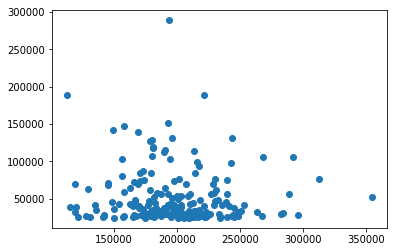

In [9]:
plt.scatter(df_Q1['Duration'], df_Q1['Streams'])
plt.show()

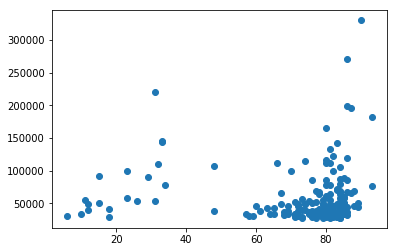

In [131]:
plt.scatter(df_Q2['Popularity'], df_Q2['Streams'])
plt.show()

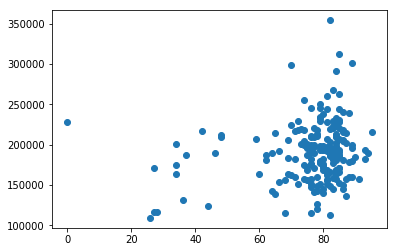

In [133]:
plt.scatter(df_Q3['Popularity'], df_Q3['Duration'])
plt.show()

In [137]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(df_Q2['Popularity'], df_Q2['Streams'])
rvalue

-0.02642888260522023

#Analysis of tempo 🚚


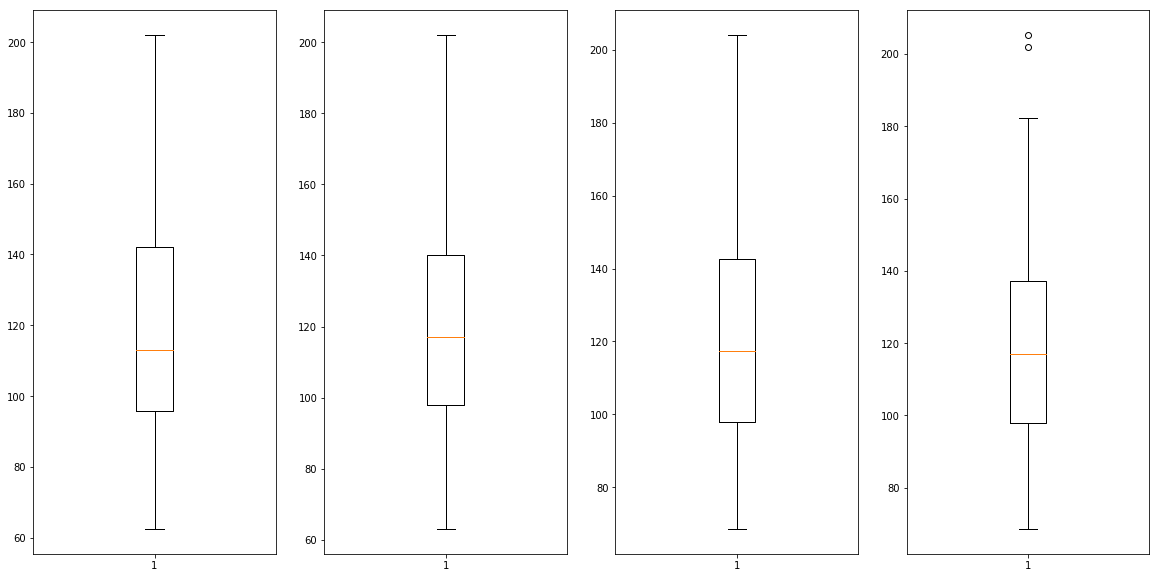

In [165]:
fig1, axs = plt.subplots(1,4,figsize=(20,10))



ax1, ax2, ax3, ax4 = axs

plt.setp(ax1, xticklabels=['Q1'])
plt.setp(ax2, xticklabels=['Q2'])
plt.setp(ax3, xticklabels=['Q3'])
plt.setp(ax4, xticklabels=['Q4'])


ax1.boxplot(df_Q1['Tempo'])
ax2.boxplot(df_Q2['Tempo'])
ax3.boxplot(df_Q3['Tempo'])
ax4.boxplot(df_Q4['Tempo'])

plt.show()

In [159]:
Q1_tempo_summary=df_Q1['Tempo'].describe()
Q2_tempo_summary=df_Q2['Tempo'].describe()
Q3_tempo_summary=df_Q3['Tempo'].describe()
Q4_tempo_summary=df_Q4['Tempo'].describe()
dff=[Q1_tempo_summary,Q2_tempo_summary,Q3_tempo_summary,Q4_tempo_summary]
Tempo_summary_df=pd.DataFrame(dff, index=(["Q1","Q2","Q3","Q4"]))
Tempo_summary_df



,count,mean,std,min,25%,50%,75%,max
Q1,200.0,117.806420,29.191265,62.446,95.66575,113.1580,142.21050,202.006
Q2,200.0,119.556690,28.182540,63.050,97.91125,116.9625,140.02200,202.015
Q3,200.0,120.992890,30.047519,68.534,97.98550,117.4550,142.53925,204.096
Q4,200.0,118.938155,27.882898,68.534,97.97525,116.9690,137.21700,205.272


Average streams 

In [166]:
Q1_streams_summary=df_Q1['Streams'].describe()
Q2_streams_summary=df_Q2['Streams'].describe()
Q3_streams_summary=df_Q3['Streams'].describe()
Q4_streams_summary=df_Q4['Streams'].describe()
df_s=[Q1_streams_summary,Q2_streams_summary,Q3_streams_summary,Q4_streams_summary]
Streams_summary_df=pd.DataFrame(df_s, index=(["Q1","Q2","Q3","Q4"]))
Streams_summary_df



,count,mean,std,min,25%,50%,75%,max
Q1,200.0,51413.46,36237.174960,24631.0,28621.25,37850.5,57722.25,288698.0
Q2,200.0,56983.13,41817.623754,27811.0,33887.00,42393.5,60421.50,330333.0
Q3,200.0,54346.11,30139.431338,28612.0,33653.75,41594.0,64280.75,201548.0
Q4,200.0,58987.33,36003.740529,31661.0,36310.75,45748.5,66280.00,268419.0


Mean Analysis

In [88]:
Quarters_mean_summary={"Streams":{"Q1":df_Q1['Streams'].mean(),"Q2":df_Q2['Streams'].mean(),"Q3":df_Q3['Streams'].mean(),"Q4":df_Q4['Streams'].mean()},
                "Tempo":{"Q1":df_Q1['Tempo'].mean(),"Q2":df_Q2['Tempo'].mean(),"Q3":df_Q3['Tempo'].mean(),"Q4":df_Q4['Tempo'].mean()},
                "Valence":{"Q1":df_Q1['Valence'].mean(),"Q2":df_Q2['Valence'].mean(),"Q3":df_Q3['Valence'].mean(),"Q4":df_Q4['Valence'].mean()},
                "Speechiness":{"Q1":df_Q1['Speechiness'].mean(),"Q2":df_Q2['Speechiness'].mean(),"Q3":df_Q3['Speechiness'].mean(),"Q4":df_Q4['Speechiness'].mean()},
                "Danceability":{"Q1":df_Q1['Danceability'].mean(),"Q2":df_Q2['Danceability'].mean(),"Q3":df_Q3['Danceability'].mean(),"Q4":df_Q4['Danceability'].mean()}}
pd.DataFrame(Quarters_mean_summary)



,Streams,Tempo,Valence,Speechiness,Danceability
Q1,51413.46,117.806420,0.441819,0.137655,0.705750
Q2,56983.13,119.556690,0.508215,0.116193,0.706060
Q3,54346.11,120.992890,0.501311,0.143260,0.711440
Q4,58987.33,118.938155,0.463131,0.124981,0.705295


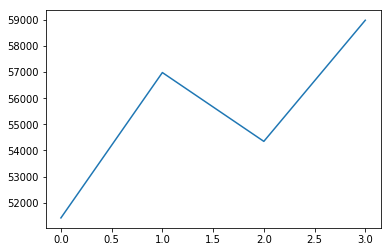

In [91]:
Quarters_mean_summary={"Streams":[df_Q1['Streams'].mean(),df_Q2['Streams'].mean(),df_Q3['Streams'].mean(),df_Q4['Streams'].mean()]
,"Tempo":[df_Q1['Tempo'].mean(),df_Q2['Tempo'].mean(),df_Q3['Tempo'].mean(),df_Q4['Tempo'].mean()],
                "Valence":[df_Q1['Valence'].mean(),df_Q2['Valence'].mean(),df_Q3['Valence'].mean(),df_Q4['Valence'].mean()],
                "Speechiness":[df_Q1['Speechiness'].mean(),df_Q2['Speechiness'].mean(),df_Q3['Speechiness'].mean(),df_Q4['Speechiness'].mean()],
                "Danceability":[df_Q1['Danceability'].mean(),df_Q2['Danceability'].mean(),df_Q3['Danceability'].mean(),df_Q4['Danceability'].mean()]}
pd.DataFrame(Quarters_mean_summary)
plt.plot(Quarters_mean_summary["Streams"])


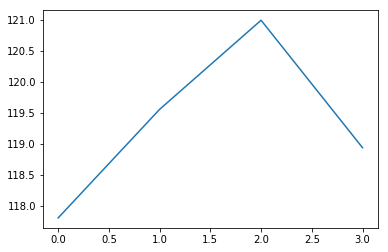

In [92]:
plt.plot(Quarters_mean_summary["Tempo"])


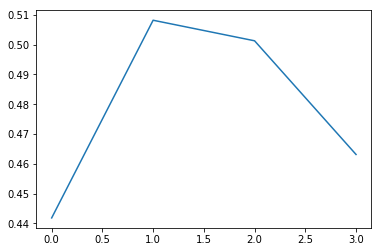

In [93]:
plt.plot(Quarters_mean_summary["Valence"])

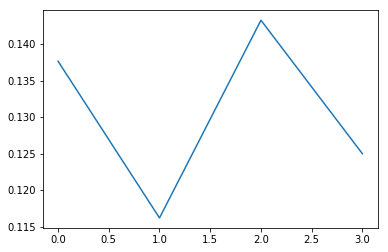

In [94]:
plt.plot(Quarters_mean_summary["Speechiness"])

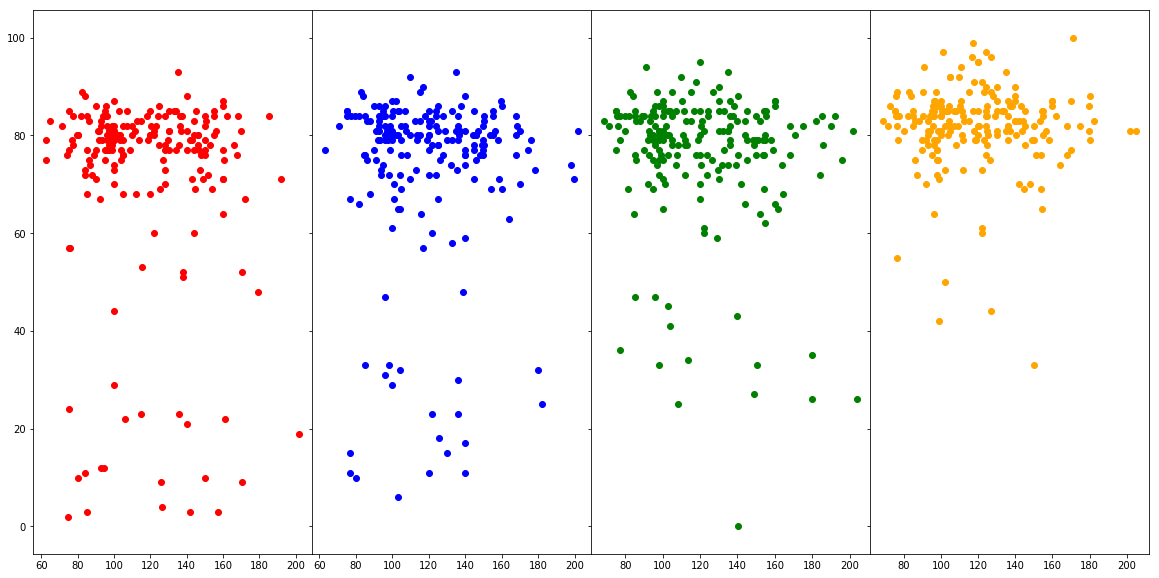

In [95]:

#Finding any possible correlation between tempo and popularity

fig2, axs = plt.subplots(1,4,sharex='col', sharey='row',
                        gridspec_kw={'hspace': 0, 'wspace': 0},figsize=(20,10))
ax1, ax2, ax3, ax4 = axs

ax1.scatter(df_Q1['Tempo'], df_Q1['Popularity'],color='red')
ax2.scatter(df_Q2['Tempo'], df_Q2['Popularity'],color='blue')
ax3.scatter(df_Q3['Tempo'], df_Q3['Popularity'],color='green')
ax4.scatter(df_Q4['Tempo'], df_Q4['Popularity'],color='orange')

In [121]:
print(f"The correlation coefficient between Q1 Tempo and Popularity is {round(pearsonr(df_Q1['Tempo'],df_Q1['Popularity'])[0],2)}")
print(f"The correlation coefficient between Q2 Tempo and Popularity is {round(pearsonr(df_Q2['Tempo'],df_Q2['Popularity'])[0],2)}")
print(f"The correlation coefficient between Q3 Tempo and Popularity is {round(pearsonr(df_Q3['Tempo'],df_Q3['Popularity'])[0],2)}")
print(f"The correlation coefficient between Q4 Tempo and Popularity is {round(pearsonr(df_Q4['Tempo'],df_Q4['Popularity'])[0],2)}")

The correlation coefficient between Q1 Tempo and Popularity is -0.07
The correlation coefficient between Q2 Tempo and Popularity is -0.0
The correlation coefficient between Q3 Tempo and Popularity is -0.15
The correlation coefficient between Q4 Tempo and Popularity is -0.02


In [120]:
print(f"The correlation coefficient between Q1 Tempo and Duration is {round(pearsonr(df_Q1['Tempo'],df_Q1['Duration'])[0],2)}")
print(f"The correlation coefficient between Q2 Tempo and Duration is {round(pearsonr(df_Q2['Tempo'],df_Q2['Duration'])[0],2)}")
print(f"The correlation coefficient between Q3 Tempo and Duration is {round(pearsonr(df_Q3['Tempo'],df_Q3['Duration'])[0],2)}")
print(f"The correlation coefficient between Q4 Tempo and Duration is {round(pearsonr(df_Q4['Tempo'],df_Q4['Duration'])[0],2)}")

The correlation coefficient between Q1 Tempo and Duration is 0.1
The correlation coefficient between Q2 Tempo and Duration is 0.0
The correlation coefficient between Q3 Tempo and Duration is -0.15
The correlation coefficient between Q4 Tempo and Duration is -0.1


~top 50 vs bottom 50

In [144]:
Q1_t50_df=df_Q1.head(50)
Q1_b50_df=df_Q1.tail(50)
pprint(f'Pvalue for top50 vs bottom 50 in quarter 1 of 2019 is {round(f_oneway(Q1_t50_df.Tempo,Q1_b50_df.Tempo)[1],4)}')

'Pvalue for top50 vs bottom 50 in quarter 1 of 2019 is 0.9998'


In [171]:
print(f'The average tempo of bottom 50 songs vs top 50 songs in Q2 {round(Q2_b50_df.Tempo.mean(),4)} vs {round(Q2_t50_df.Tempo.mean(),4)}')

print(f'The average tempo of bottom 50 songs vs top 50 songs in Q3 {round(Q3_b50_df.Tempo.mean(),4)} vs {round(Q3_t50_df.Tempo.mean(),4)}')

print(f'The average tempo of bottom 50 songs vs top 50 songs in Q4 {Q4_b50_df.Tempo.mean()} vs {Q4_t50_df.Tempo.mean()}')

The average tempo of bottom 50 songs vs top 50 songs in Q2 128.1745 vs 113.7046
The average tempo of bottom 50 songs vs top 50 songs in Q3 121.3086 vs 120.3106
The average tempo of bottom 50 songs vs top 50 songs in Q4 120.53556 vs 118.87192


In [172]:
Q2_t50_df=df_Q2.head(50)
Q2_b50_df=df_Q2.tail(50)
print(f'Pvalue for top50 vs bottom 50 in quarter 2 of 2019 is {round(f_oneway(Q2_t50_df.Tempo,Q2_b50_df.Tempo)[1],4)}')

Pvalue for top50 vs bottom 50 in quarter 2 of 2019 is 0.0105


In [173]:
Q3_t50_df=df_Q3.head(50)
Q3_b50_df=df_Q3.tail(50)
print(f'Pvalue for top50 vs bottom 50 in quarter 3 of 2019 is {round(f_oneway(Q3_t50_df.Tempo,Q3_b50_df.Tempo)[1],4)}')

Pvalue for top50 vs bottom 50 in quarter 3 of 2019 is 0.8686


In [174]:
Q4_t50_df=df_Q4.head(50)
Q4_b50_df=df_Q4.tail(50)
print(f'Pvalue for top50 vs bottom 50 in quarter 1 of 2019 is {round(f_oneway(Q4_t50_df.Tempo,Q4_b50_df.Tempo)[1],4)}')

Pvalue for top50 vs bottom 50 in quarter 1 of 2019 is 0.7594


In [175]:
print(f'Pvalue for overall tempo 2019 is {round(f_oneway(df_Q1.Tempo,df_Q2.Tempo,df_Q3.Tempo,df_Q4.Tempo)[1],4)}')

Pvalue for overall tempo 2019 is 0.7357


####Results shows that there is no statistically significant difference between tempo amongst the 4 quarters